In [1]:
#importing all necessary libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
#reading the data and primary inspection
data=pd.read_csv("Leads.csv")

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.shape

(9240, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [141]:
#null count

In [6]:
data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Data cleaning

In [7]:
#we can drop the columns having more than 40% null values

data=data.drop(columns=["Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"])


In [10]:
data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [ ]:
#now let us plot for some colums having null percentage <40%

In [8]:
cols=['Country','Specialization','How did you hear about X Education','What is your current occupation',
      'What matters most to you in choosing a course','Tags','Lead Profile','City',"Lead Source","TotalVisits","Page Views Per Visit","Last Activity"]

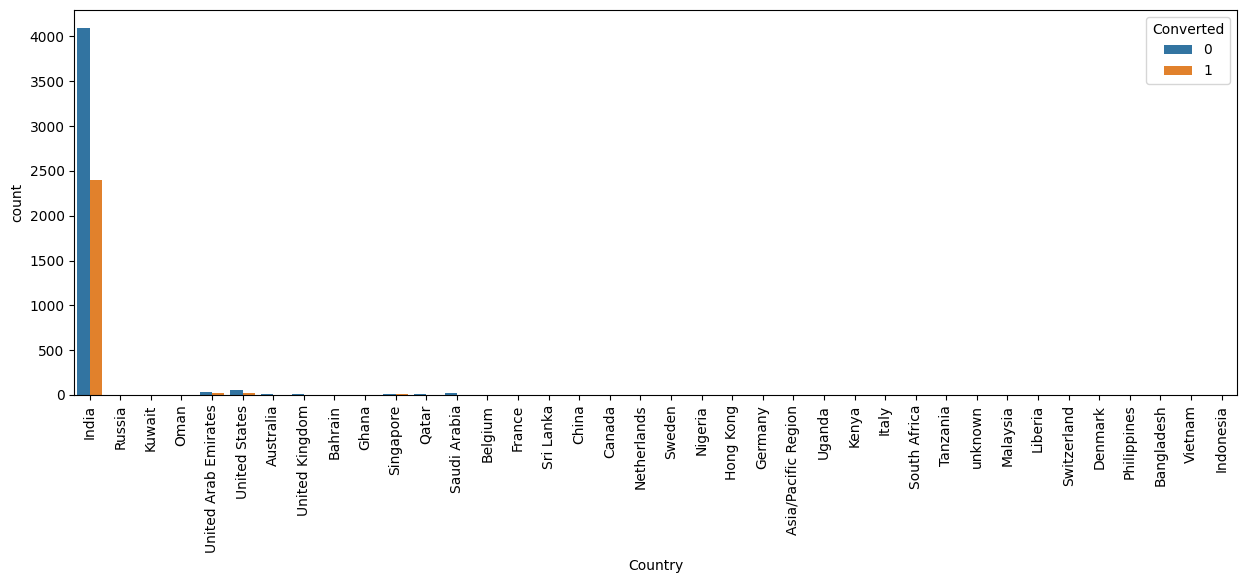

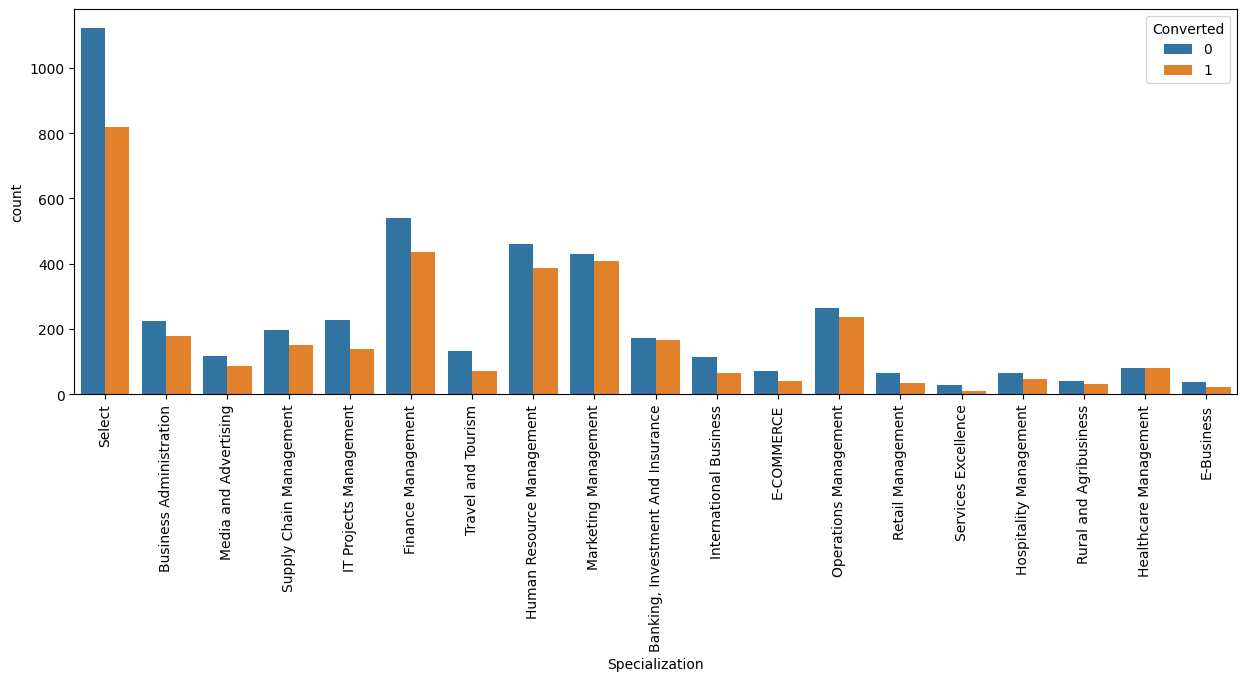

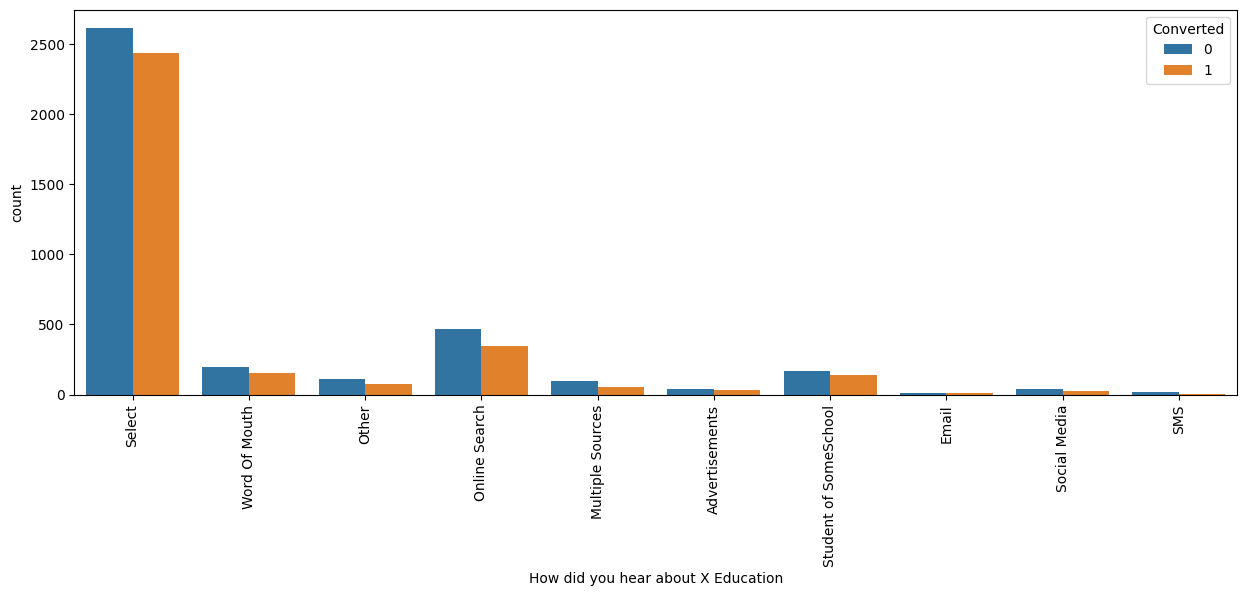

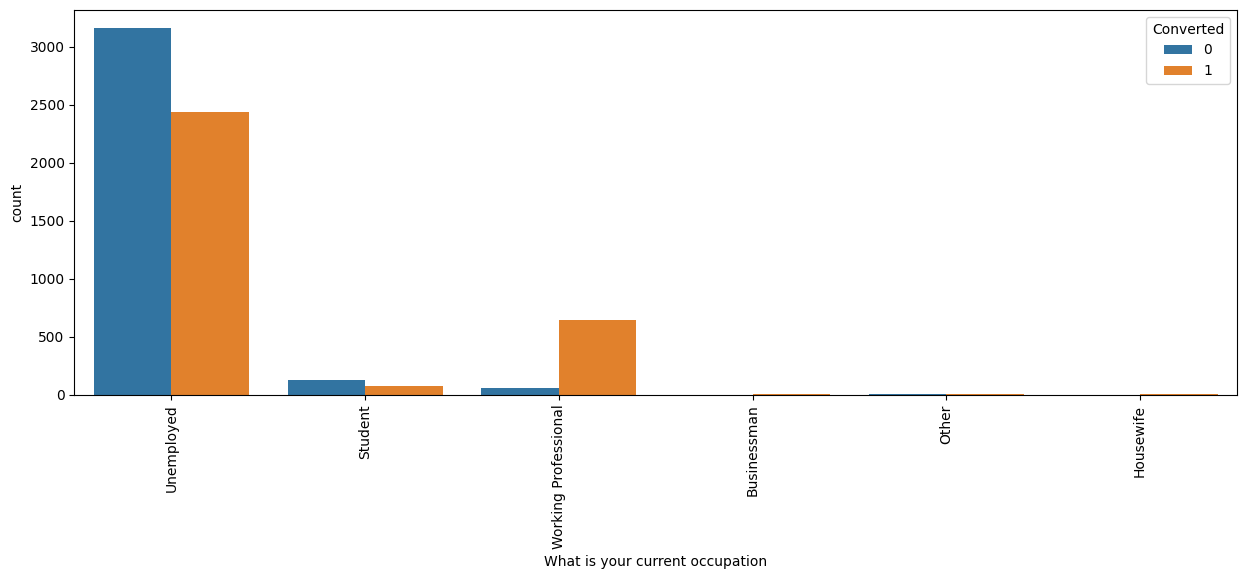

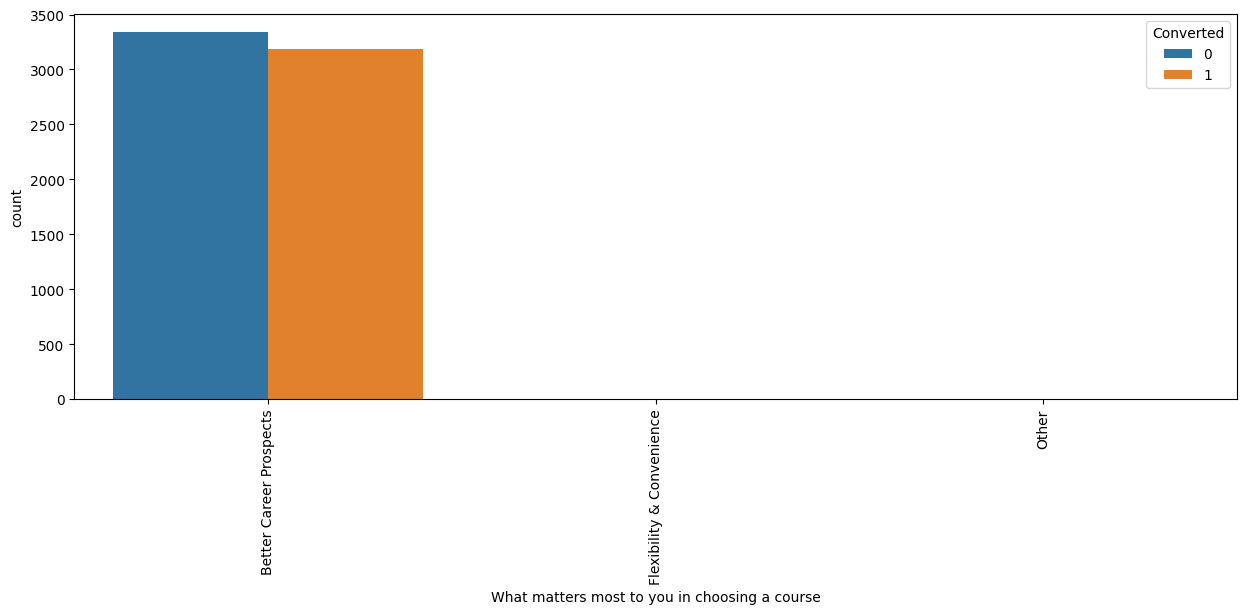

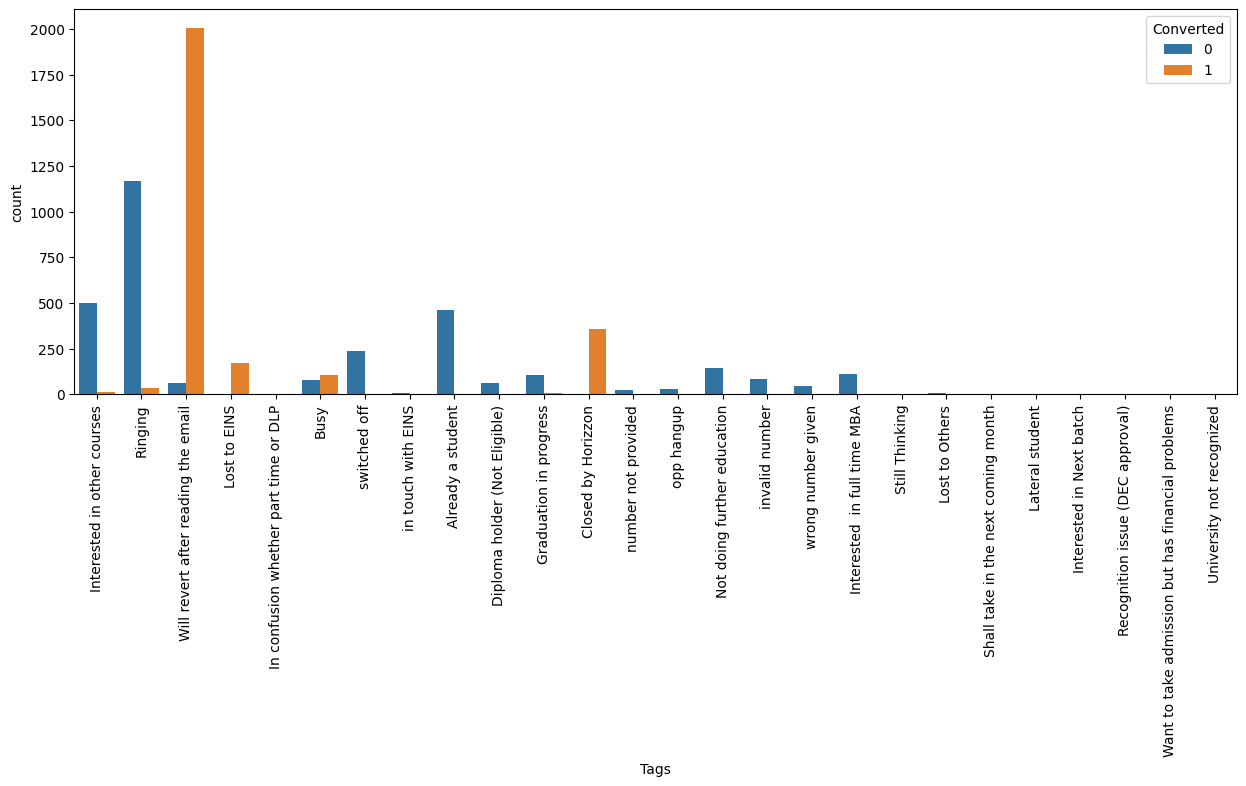

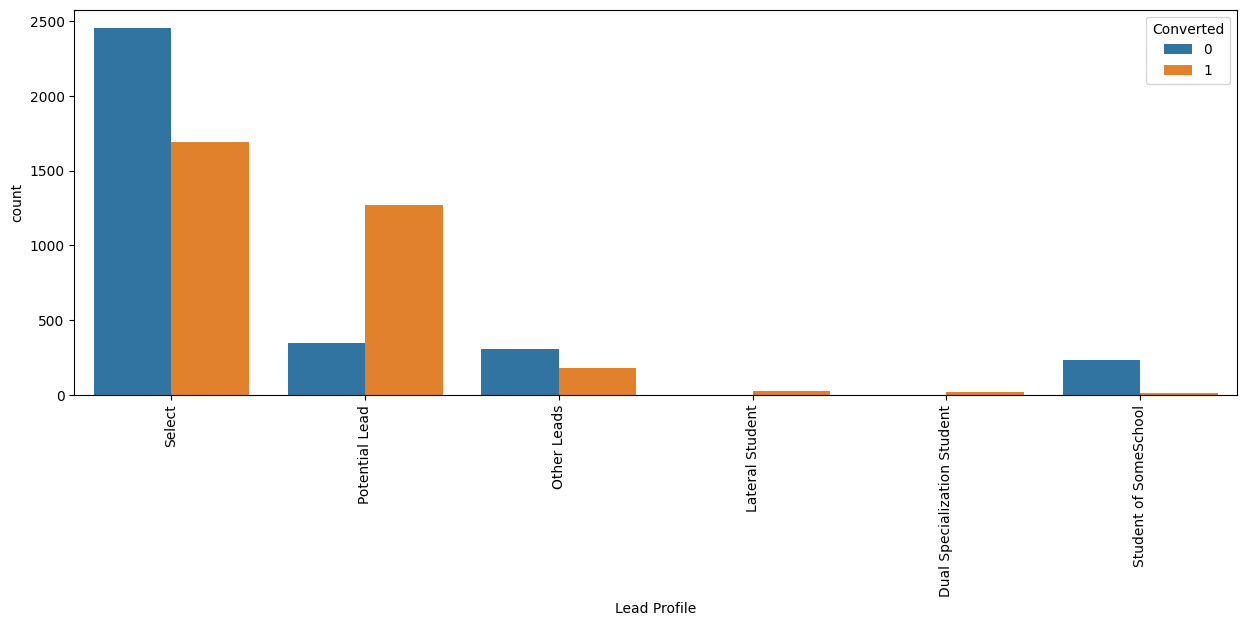

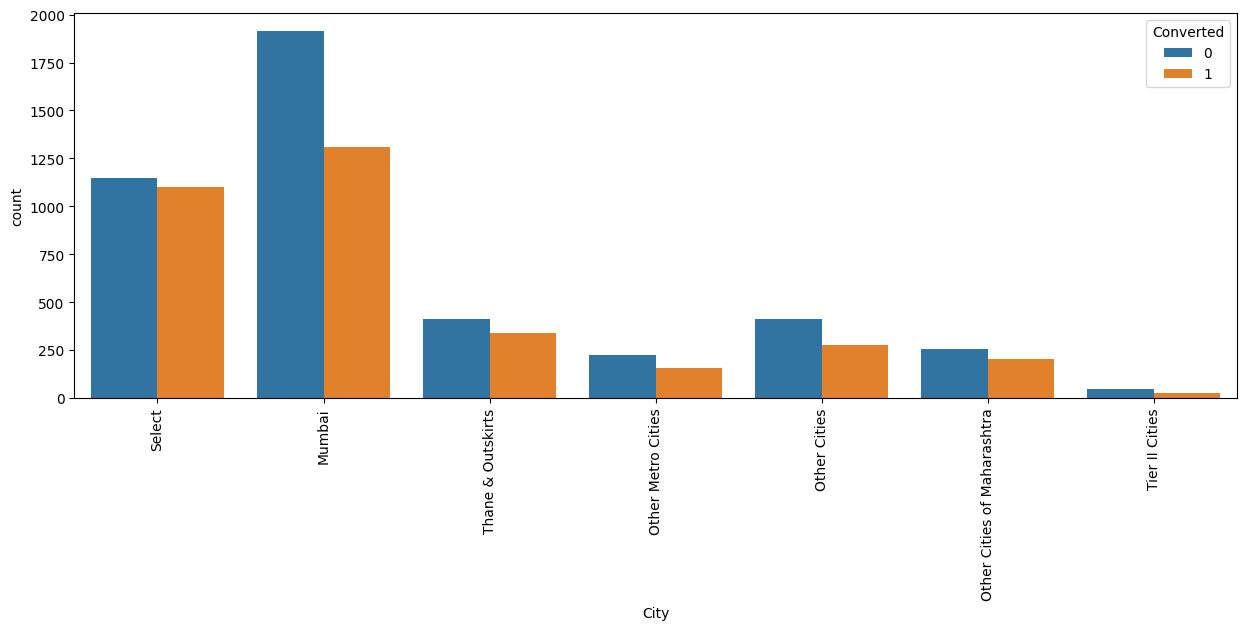

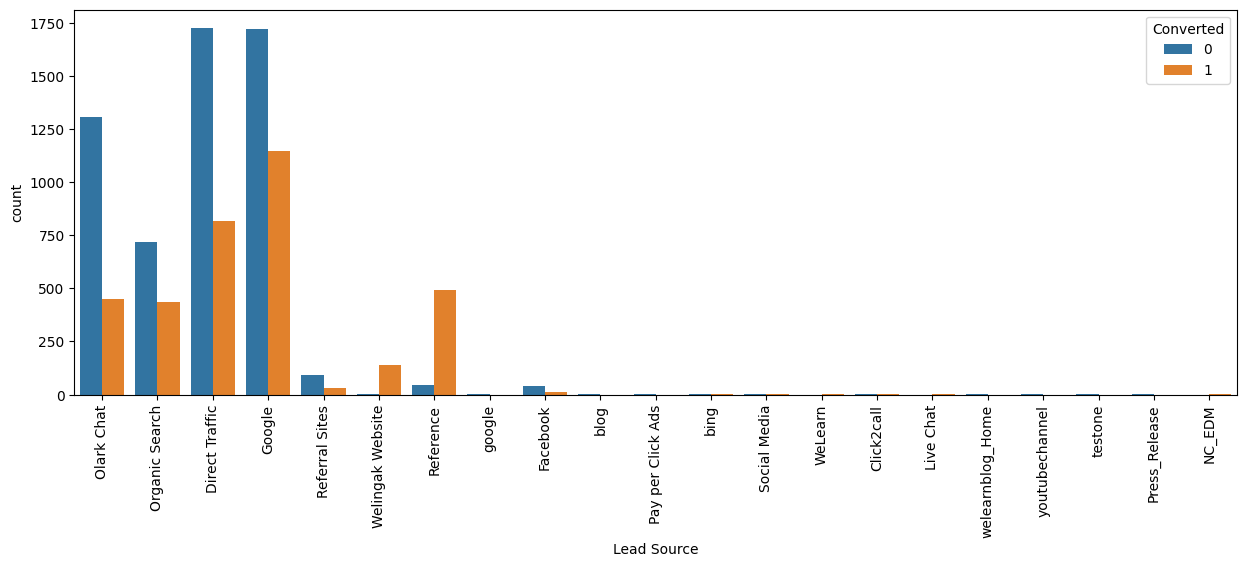

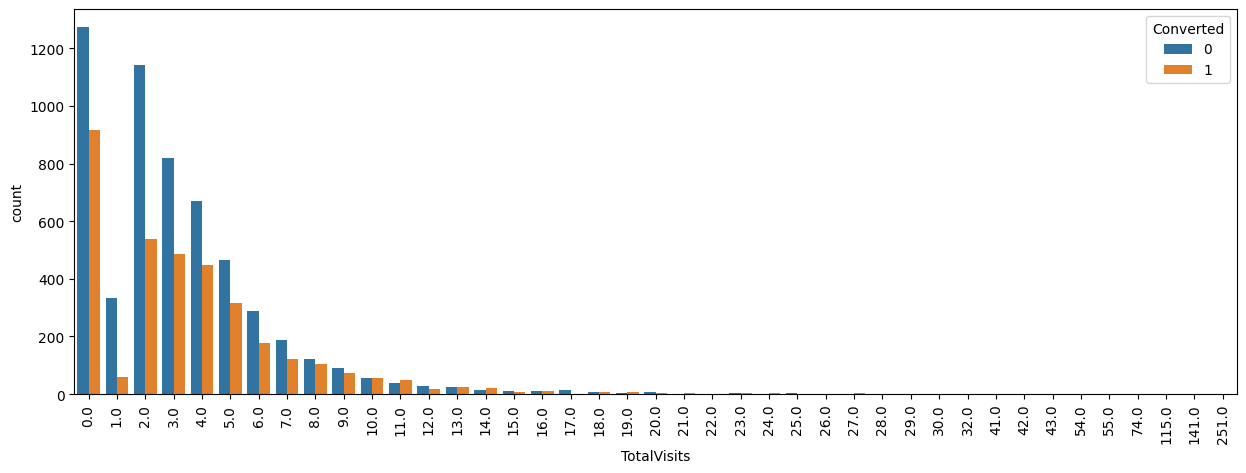

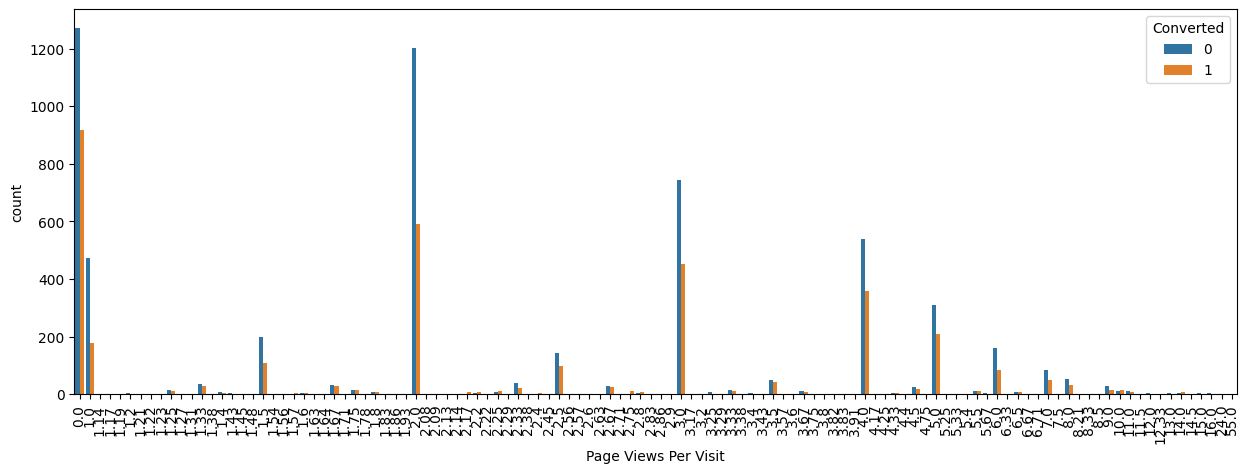

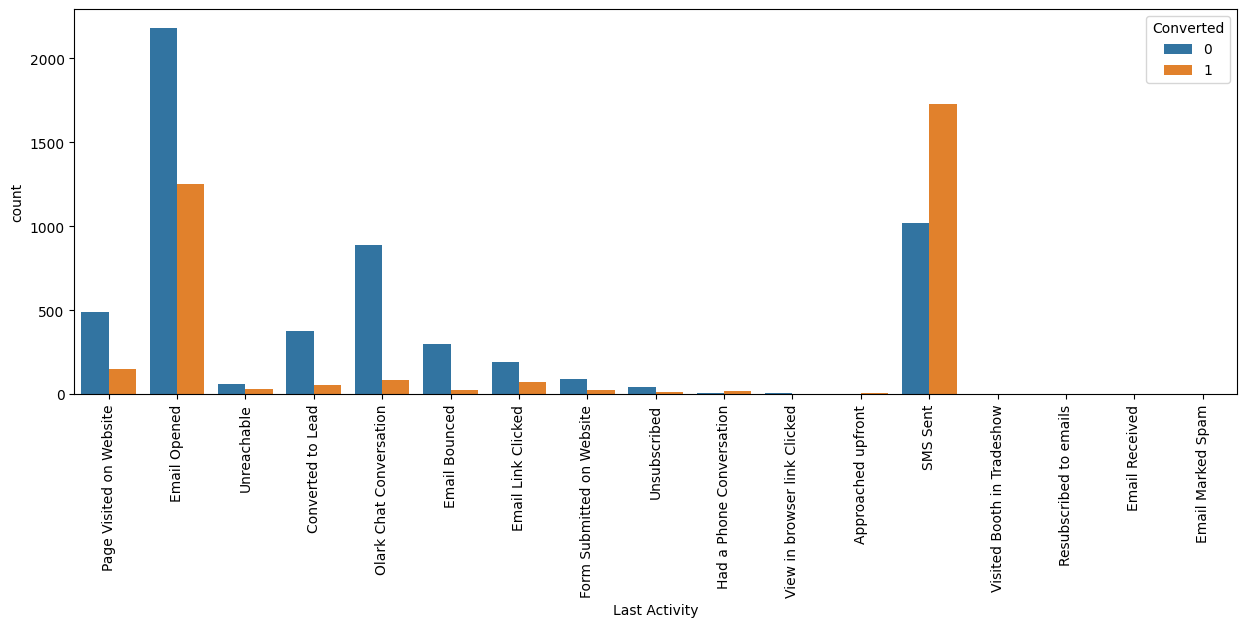

In [9]:

for i in cols:
    plt.figure(figsize=(15,5))
    s1=sns.countplot(x =i, data =data,hue=data.Converted)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

In [10]:
for i in cols:
  print(i)
  print("__________________")
  print(data[i].value_counts(dropna=False))
  print("\n")

Country
__________________
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia         

Imputation from above obsevation

1. We see that most common value in country column is India so we can impute India for missing values
2. We can impute select in place of nan values for Specialization Column and later change select as not given
3.We can impute not mentioned in place of nan values for 'How did you hear about X Education' Column and and also replace the value "select" as not mentioned
4. Impute unemployed in place of nan values for the column "What is your current occupation"
5.Impute 'Better Career Prospects' in place of missing values for column "What matters most to you in choosing a course"
6.Impute no specific information in place of nan values for column Tags
7. Impute "unknown" in place of missing values for column "Lead Profile" and also replace "select" as "unknown".
8.Impute "not mentioned" in place of "select" and "Mumbai" in place of nan values for column "city"
9. For column "Lead Source", nan values will be replaced by Google, google will be replaced by "Google" as well.
10. Impute 0.0 for nan values of column 'TotalVisits'
11.Impute 0.0 for nan values of column 'Page Views Per Visit'.
12. Impute "Email Opened" in place of nan values for column 'Last Activity'


In [11]:
#Country
data['Country'] = data['Country'].replace(np.nan,'India')

In [12]:
#Specialization
data['Specialization']=data['Specialization'].replace(np.nan,"Select")

In [13]:
data['Specialization']=data['Specialization'].replace("Select","not given")

In [14]:
#How did you hear about X Education
data["How did you hear about X Education"]=data["How did you hear about X Education"].replace(np.nan,"not mentioned")

In [15]:
data["How did you hear about X Education"]=data["How did you hear about X Education"].replace("Select","not mentioned")

In [16]:
#What is your current occupation
data["What is your current occupation"]=data["What is your current occupation"].replace(np.nan,"Unemployed")

In [17]:
#What matters most to you in choosing a course
data["What matters most to you in choosing a course"]=data["What matters most to you in choosing a course"].replace(np.nan,"Better Career Prospects")

In [18]:
#Tags
data['Tags']=data["Tags"].replace(np.nan,"no specific information")

In [19]:
#Lead Profile
data["Lead Profile"]=data["Lead Profile"].replace(np.nan,"unknown")
data["Lead Profile"]=data["Lead Profile"].replace("Select","unknown")

In [20]:
#City
data["City"]=data["City"].replace(np.nan,"Mumbai")
data["City"]=data["City"].replace('Select',"not mentioned")

In [21]:
#Lead Source
data["Lead Source"]=data["Lead Source"].replace(np.nan,"Google")
data["Lead Source"]=data["Lead Source"].replace("google","Google")


In [22]:
#TotalVisits
data['TotalVisits']=data['TotalVisits'].replace(np.nan,0.0)

In [23]:
#Page Views Per Visit
data["Page Views Per Visit"]=data["Page Views Per Visit"].replace(np.nan,0.0)

In [24]:
#Last Activity
data["Last Activity"]=data["Last Activity"].replace(np.nan,"Email Opened")

In [25]:
#let us again check for missing values
data.isnull().mean()*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [27]:
for i in data.columns:
  print(i)
  print("__________________")
  print(data[i].value_counts(dropna=False))
  print("\n")

Prospect ID
__________________
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64


Lead Number
__________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64


Lead Origin
__________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Lead Source
___________

In [28]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Further inspecting the data, we observed that high data imbalance in some column ,so we drop them and also drop prospect ID and lead number as these two columns contain only unique values.




In [29]:
cols_to_be_dropped=["Do Not Call","Country",'What matters most to you in choosing a course',"Search",
                    'Magazine',"Newspaper Article",'X Education Forums','Newspaper','Digital Advertisement',
                    'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content'
                    ,'Get updates on DM Content','I agree to pay the amount through cheque',"Prospect ID","Lead Number"]



In [30]:
data=data.drop(columns=cols_to_be_dropped)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   How did you hear about X Education      9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [32]:
for i in data.columns:
  print(i)
  print("__________________")
  print(data[i].value_counts(dropna=False))
  print("\n")

Lead Origin
__________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Lead Source
__________________
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64


Do Not Email
__________________
No     8506
Yes     734
Name: Do Not Email, dtype: int64


Converted
__________________
0    5679
1    3561
Name: Converted, dtype: int64


TotalVisits
______

In [ ]:
#according to value_counts some values are combined for better analysis

In [33]:
data["Tags"]=data["Tags"].replace(['invalid number',"Diploma holder (Not Eligible)",'wrong number given','opp hangup','number not provided',
                                  'in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems' ,
                                   'In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month',
                                   'University not recognized','Recognition issue (DEC approval)'],"others")

In [34]:
data["Lead Source"]=data["Lead Source"].replace("Facebook","Social Media")
data["Lead Source"]=data["Lead Source"].replace(["bing","Live Chat","Press_Release","Pay per Click Ads","blog",'WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM','Click2call'],"others")


In [35]:
data["Lead Source"].value_counts(dropna=False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
others                21
Name: Lead Source, dtype: int64

In [36]:
#let us combine everything with value_counts less or equal to 60 as for last notable activity as other notable activity
data['Last Notable Activity']=data['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam',
                                                                     'Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website',
                                                                    'Email Received'],'other notable activity')

In [37]:
data['Last Notable Activity'].value_counts(dropna=False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
other notable activity      160
Name: Last Notable Activity, dtype: int64

In [38]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
data['Last Activity'].value_counts(dropna=False)

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [40]:
data['Last Activity']=data['Last Activity'].replace(['Approached upfront','View in browser link Clicked',
                                                     'Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],"Other activity")

In [41]:
data['Last Activity'].value_counts(dropna=False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Other activity                 21
Name: Last Activity, dtype: int64

In [42]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
#EDA
#let us divide columns in categorical columns and numerical colimns

categorical_cols=['Lead Origin', 'Lead Source','Do Not Email','Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
numerical_cols=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

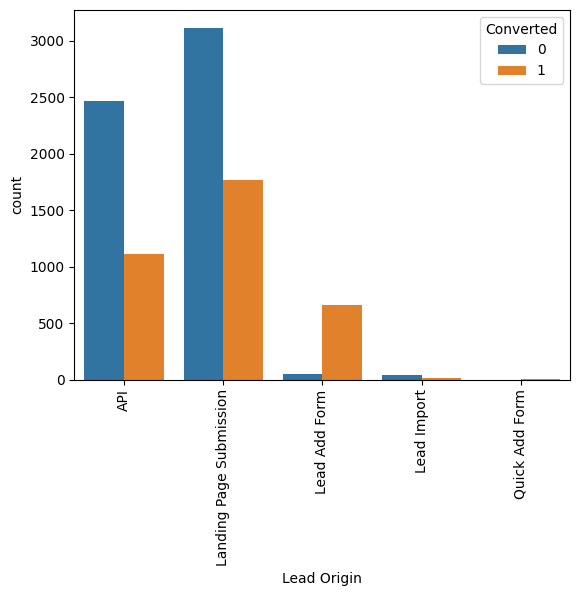

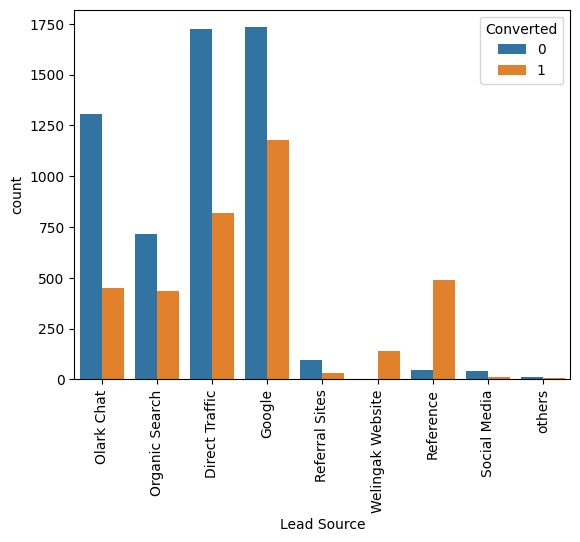

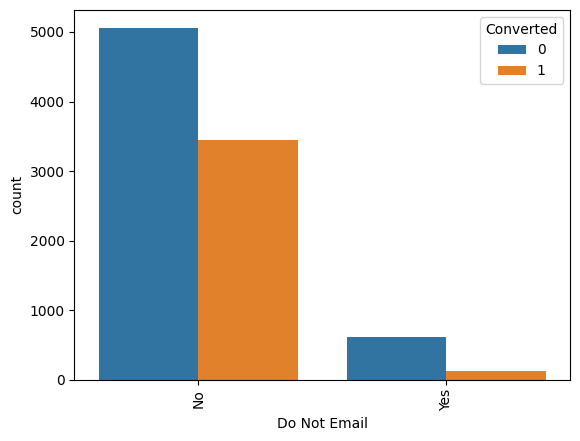

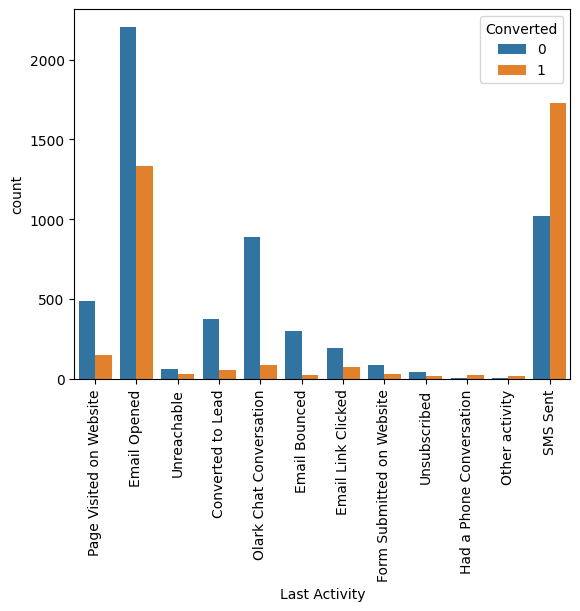

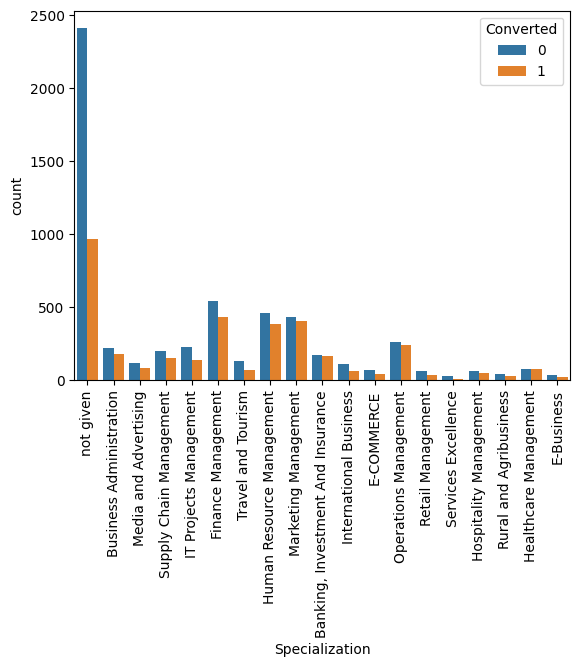

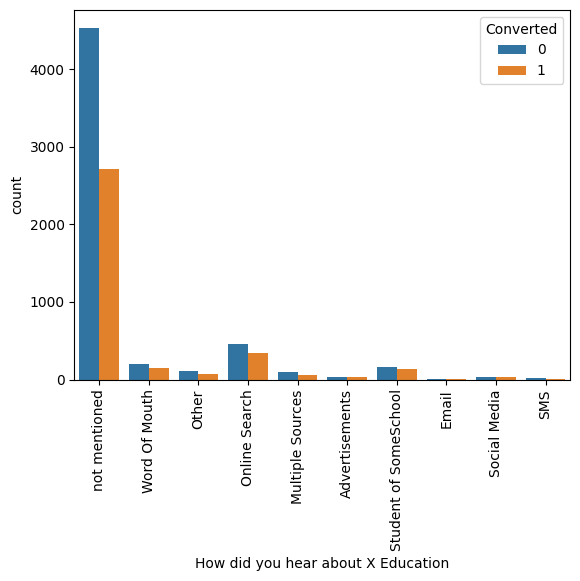

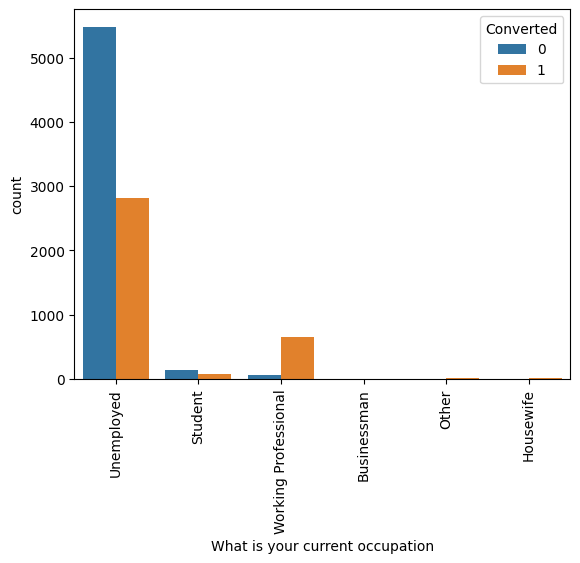

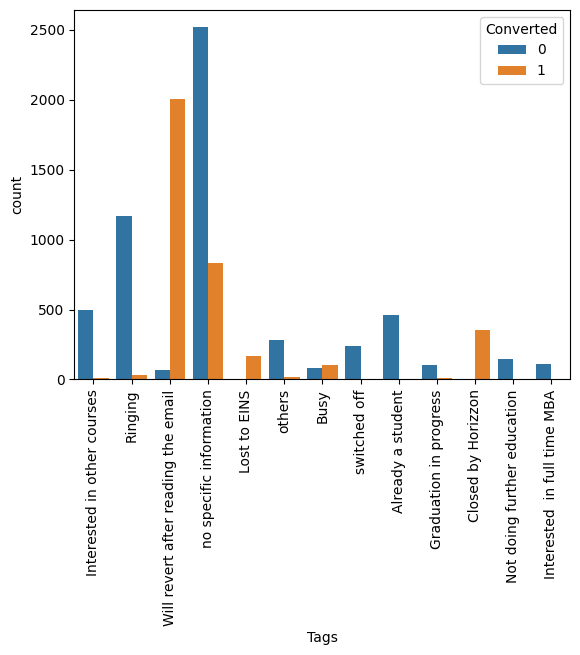

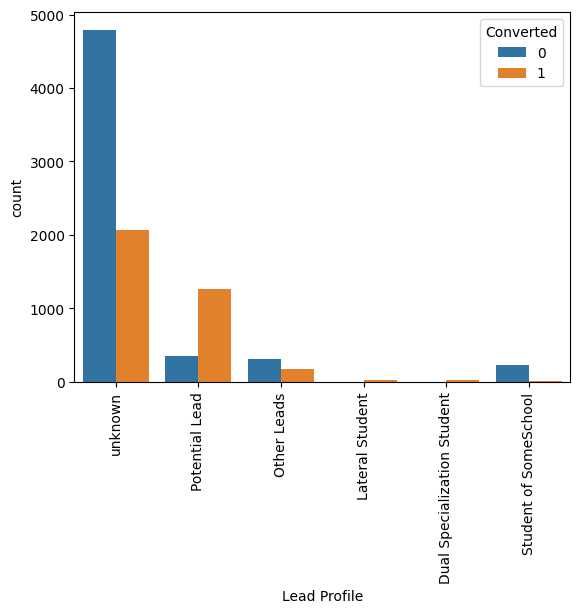

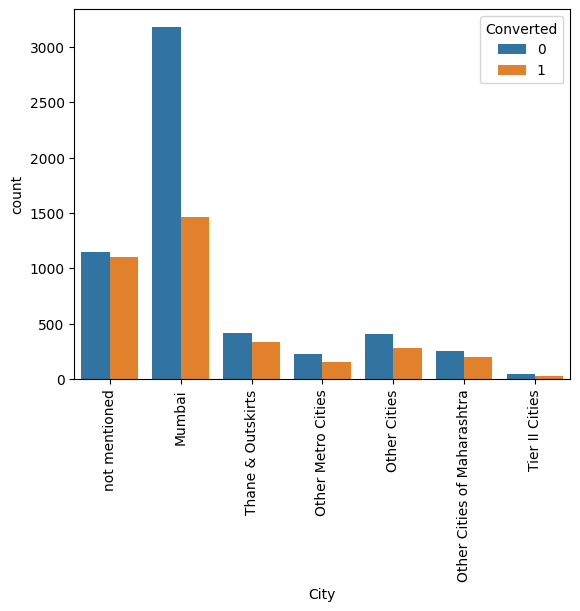

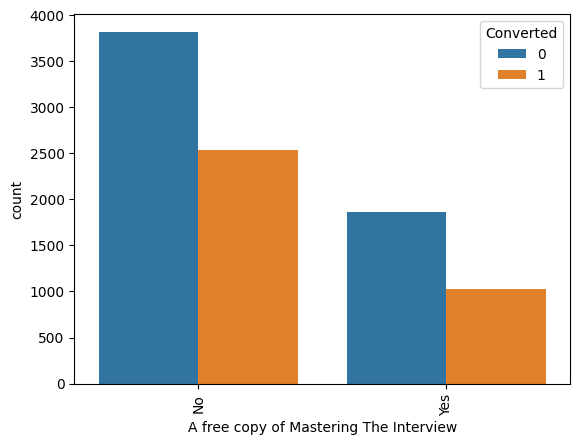

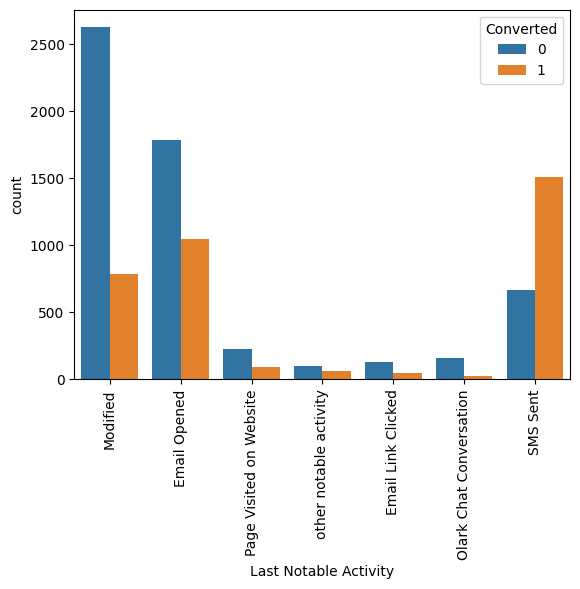

In [44]:
#categorical column analysis
for i in categorical_cols:
     ax1= sns.countplot(x=i,hue="Converted",data=data)
     ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
     plt.show()

Interference:


1.API and Landing Page Submission bring higher number of leads as well as conversion.Lead Add Form has a very high conversion rate but count of leads are not very high,so we need to bring more lead through this.Lead Import and Quick Add Form get very few leads.

2.Top Three lead source are Google,Direct Traffic and Olark Chat followed by Organic search.Google has more converted leads. We should work on converting leads from Olark chat and direct traffic.Reference has higher conversion ratio but leads are low, so try to bring leads through reference.

3.From Last activity and last notable activity it is cleared that, mostly a leads get converted if potential leads opend the mail or gets SMS.

4.Word of mouth and online search has higher converted least.

5.From unemploed category we get higher no of leads as well as conversion. We need to focus on working professional as there is higher chance of conversion.

6.Higher number of leads are from mumbai as well as conversion. We should try to bring leads from thane and other cities as it has higher conversion rate.

In [45]:
#we can drop lead profile and how did you hear about x education ,as they are not providing much information
data=data.drop(columns=["Lead Profile","How did you hear about X Education"])

In [46]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

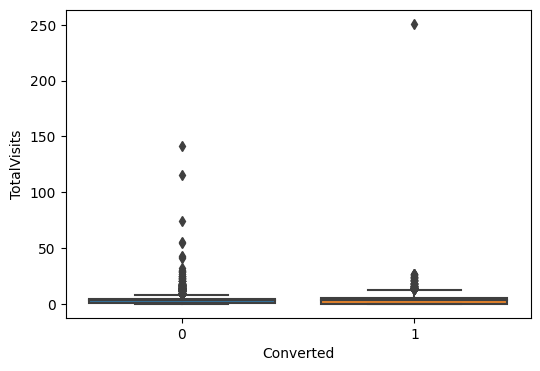

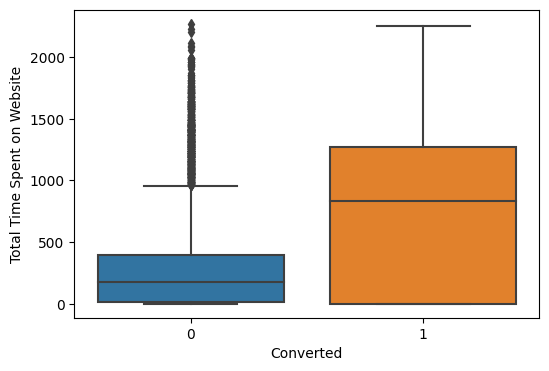

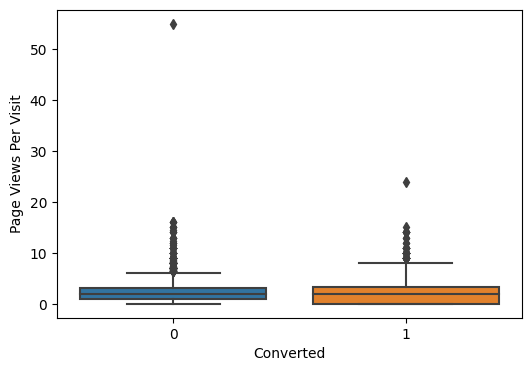

In [47]:
#numerical_cols analysis
for i in numerical_cols:
      plt.figure(figsize=(6,4))
      sns.boxplot(x=data.Converted,y=data[i])
      plt.show()

In [48]:
for i in numerical_cols:
      print(i)
      print(data[i].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]))
      print("\n")

TotalVisits
count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64


Total Time Spent on Website
count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


Page Views Per Visit
count    9240.000000
mean        2.327787
std         2.164258
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64




We see outliers for column Page Views Per Visit and Totalvisits. Let us remove them.

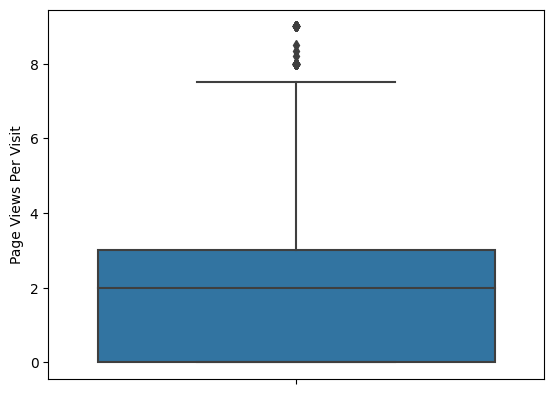

In [49]:
#outliers removing
Q3 = data['Page Views Per Visit'].quantile(0.99)
data = data[data['Page Views Per Visit'] <= Q3]
Q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

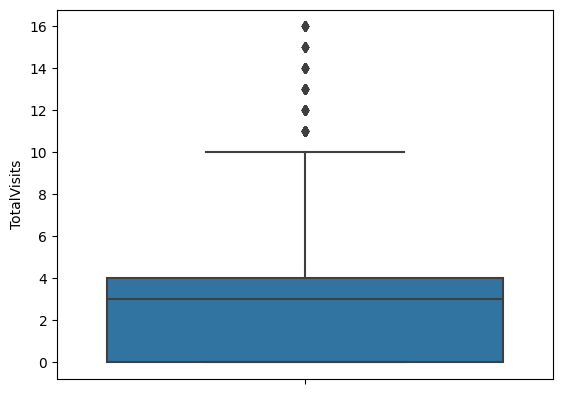

In [50]:
Q3 = data['TotalVisits'].quantile(0.99)
data = data[data['TotalVisits'] <= Q3]
Q1 = data['TotalVisits'].quantile(0.01)
data = data[data['TotalVisits'] >= Q1]
sns.boxplot(y=data['TotalVisits'])
plt.show()

In [51]:
data.shape

(9074, 14)

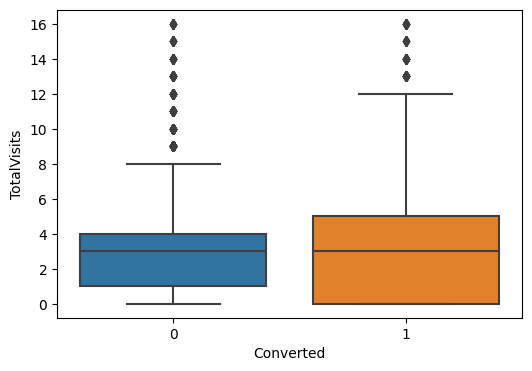

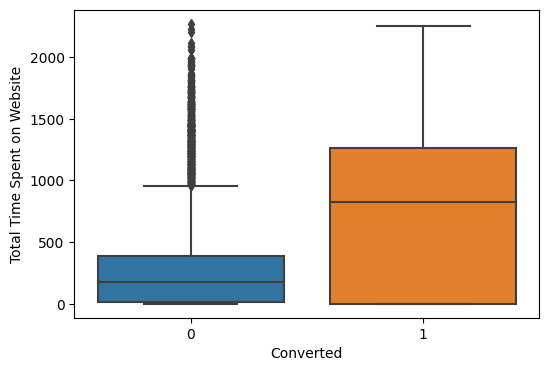

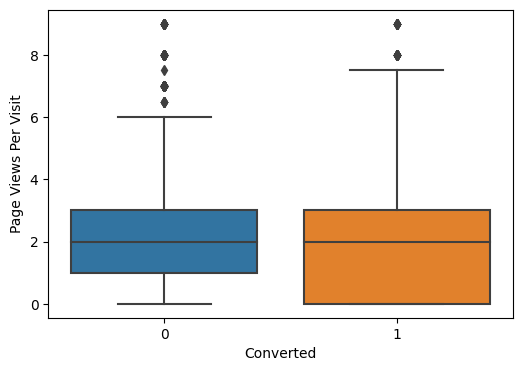

In [52]:
for i in numerical_cols:
      plt.figure(figsize=(6,4))
      sns.boxplot(x=data.Converted,y=data[i])
      plt.show()

Leads spending more times in website are likely to get converted

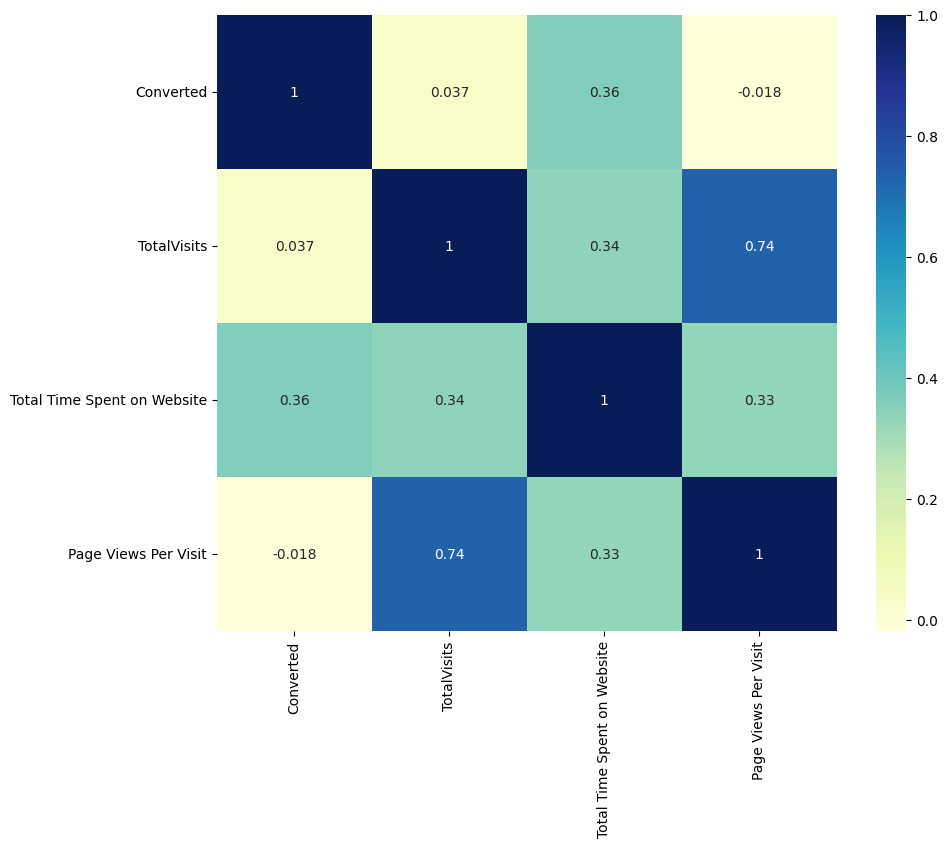

In [53]:
plt.figure(figsize=(10,8))


sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [107]:
#dummy creation


#first convert yes and no to 1 and 0 for columns Do Not Email and A free copy of Mastering The Interview

In [54]:
col=['Do Not Email','A free copy of Mastering The Interview']
def convert(x):
    return x.map({'Yes': 1, "No": 0})

In [55]:
data[col] = data[col].apply(convert)

In [56]:
dummy = pd.get_dummies(data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

data = pd.concat([data,dummy],axis=1)

In [57]:
dummy = pd.get_dummies(data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_not given'],axis= 1)
data = pd.concat([data, dummy], axis = 1)

In [58]:
dummy = pd.get_dummies(data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_others'],axis= 1)
data = pd.concat([data, dummy], axis = 1)

In [59]:
dummy = pd.get_dummies(data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(["Last Activity_Other activity"],axis= 1)
data = pd.concat([data, dummy], axis = 1)

In [60]:
dummy = pd.get_dummies(data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(["Last Notable Activity_other notable activity"],axis= 1)
data = pd.concat([data, dummy], axis = 1)

In [61]:
dummy = pd.get_dummies(data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(["Tags_no specific information"],axis= 1)
data = pd.concat([data, dummy], axis = 1)

In [62]:
#let us drop original columns
col_drop=['Lead Origin', 'Lead Source','Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
        'Last Notable Activity']

In [63]:
data.drop(col_drop,axis=1,inplace=True)

In [64]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not mentioned,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_others,Tags_switched off
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Train-Test Split & Logistic Regression Model Building:

In [65]:
#Train-Test Split
y = data['Converted']
y.head()
X=data.drop('Converted', axis=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 2982 to 5738
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   int64  
 3   Page Views Per Visit                                  6351 non-null   float64
 4   A free copy of Mastering The Interview                6351 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 7   Lead Origin_Lead Import                               6351 non-null   uint8  
 8   Lead Origin_Quick Add Form                            6

In [68]:
#Scaling
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not mentioned,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_others,Tags_switched off
2982,0,0.687750,1.793394,1.471984,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
996,0,-1.077344,-0.881818,-1.169141,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.077344,-0.881818,-1.169141,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4722,1,1.746807,-0.572229,0.943759,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7983,0,-1.077344,-0.881818,-1.169141,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
#rfe

In [69]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [70]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('TotalVisits', False, 37),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 38),
 ('A free copy of Mastering The Interview', False, 58),
 ('Lead Origin_Landing Page Submission', False, 51),
 ('Lead Origin_Lead Add Form', False, 3),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 20),
 ('What is your current occupation_Housewife', False, 15),
 ('What is your current occupation_Other', False, 45),
 ('What is your current occupation_Student', False, 54),
 ('What is your current occupation_Unemployed', False, 32),
 ('What is your current occupation_Working Professional', False, 11),
 ('City_Other Cities', False, 35),
 ('City_Other Cities of Maharashtra', False, 57),
 ('City_Other Metro Cities', False, 46),
 ('City_Thane & Outskirts', False, 53),
 ('City_Tier II Cities', False, 52),
 ('City_not mentioned', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 36),
 ('Specialization_Bu

In [71]:
col = X_train.columns[rfe.support_]
col

Index(['City_not mentioned', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_others',
       'Tags_switched off'],
      dtype='object')

In [72]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Managem

In [73]:
#model_building 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1394.3
Date:                Sun, 19 Nov 2023   Deviance:                       2788.6
Time:                        12:29:04   Pearson chi2:                 1.28e+04
No. Iterations:                    25   Pseudo R-squ. (CS):             0.5925
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1169      0.076    -28.021      0.000      -2.265      -1.969
City_not mentioned                           1.6800      0.130     12.931      0.000       1.425       1.935
Lead Source_Welingak Website                 3.6073      0.741      4.865      0.000       2.154       5.061
Last Activity_SMS Sent                       0.4986      0.194      2.575      0.010       0.119       0.878
Last Notable Activity_SMS Sent               2.3397      0.210     11.132      0.000       1.928       2.752
Tags_Already a student                     -25.3758   1.95e+04     -0.001      0.999   -3.82e+04    3.82e+04
Tags_Closed by Horizzon                      7.1827      1.005      7.145      0.000       5.212       9.153
Tags_Graduation in progress                 -2.0435      0.604     -3.382      0.001      -3.228      -0.859
Tags_Interested  in full time MBA           -2.0966      0.604     -3.473      0.001      -3.280      -0.913
Tags_Interested in other courses            -3.0535      0.408     -7.483      0.000      -3.853      -2.254
Tags_Lost to EINS                            5.1843      0.516     10.056      0.000       4.174       6.195
Tags_Not doing further education           -25.0743   3.46e+04     -0.001      0.999   -6.79e+04    6.78e+04
Tags_Ringing                                -3.8614      0.245    -15.766      0.000      -4.341      -3.381
Tags_Will revert after reading the email     4.6592      0.166     28.129      0.000       4.335       4.984
Tags_others                                 -2.6074      0.333     -7.824      0.000      -3.261      -1.954
Tags_switched off                           -4.2619      0.607     -7.018      0.000      -5.452      -3.072
============================================================================================================
"""

Tags_Already a student has high p value .so Let us drop it

In [74]:
col = col.drop('Tags_Already a student',1)

In [75]:
#Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1462.6
Date:                Sun, 19 Nov 2023   Deviance:                       2925.2
Time:                        12:29:13   Pearson chi2:                 1.32e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5836
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2825      0.076    -30.076      0.000      -2.431      -2.134
City_not mentioned                           1.3136      0.119     11.065      0.000       1.081       1.546
Lead Source_Welingak Website                 4.0319      0.736      5.478      0.000       2.589       5.474
Last Activity_SMS Sent                       0.6214      0.192      3.232      0.001       0.245       0.998
Last Notable Activity_SMS Sent               2.4080      0.209     11.548      0.000       1.999       2.817
Tags_Closed by Horizzon                      7.3813      1.005      7.344      0.000       5.411       9.351
Tags_Graduation in progress                 -1.6757      0.603     -2.780      0.005      -2.857      -0.494
Tags_Interested  in full time MBA           -1.6734      0.599     -2.792      0.005      -2.848      -0.499
Tags_Interested in other courses            -2.6364      0.406     -6.499      0.000      -3.432      -1.841
Tags_Lost to EINS                            5.3589      0.515     10.401      0.000       4.349       6.369
Tags_Not doing further education           -22.7903   1.29e+04     -0.002      0.999   -2.52e+04    2.52e+04
Tags_Ringing                                -3.6467      0.240    -15.204      0.000      -4.117      -3.177
Tags_Will revert after reading the email     4.8306      0.166     29.176      0.000       4.506       5.155
Tags_others                                 -2.4217      0.332     -7.291      0.000      -3.073      -1.771
Tags_switched off                           -4.1214      0.603     -6.834      0.000      -5.303      -2.939
============================================================================================================
"""

dropping column Tags_Not doing further education for high p value

In [76]:
col = col.drop('Tags_Not doing further education',1)

In [77]:
#Model 3
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1477.3
Date:                Sun, 19 Nov 2023   Deviance:                       2954.6
Time:                        12:29:21   Pearson chi2:                 1.35e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5817
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3278      0.076    -30.744      0.000      -2.476      -2.179
City_not mentioned                           1.2943      0.118     10.991      0.000       1.063       1.525
Lead Source_Welingak Website                 4.0897      0.736      5.558      0.000       2.648       5.532
Last Activity_SMS Sent                       0.6303      0.192      3.286      0.001       0.254       1.006
Last Notable Activity_SMS Sent               2.4354      0.208     11.702      0.000       2.028       2.843
Tags_Closed by Horizzon                      7.4287      1.005      7.391      0.000       5.459       9.399
Tags_Graduation in progress                 -1.6227      0.603     -2.691      0.007      -2.805      -0.441
Tags_Interested  in full time MBA           -1.6154      0.599     -2.697      0.007      -2.790      -0.441
Tags_Interested in other courses            -2.5830      0.406     -6.363      0.000      -3.379      -1.787
Tags_Lost to EINS                            5.4047      0.515     10.490      0.000       4.395       6.415
Tags_Ringing                                -3.6228      0.240    -15.115      0.000      -4.093      -3.153
Tags_Will revert after reading the email     4.8752      0.166     29.452      0.000       4.551       5.200
Tags_others                                 -2.3953      0.332     -7.204      0.000      -3.047      -1.744
Tags_switched off                           -4.1022      0.603     -6.803      0.000      -5.284      -2.920
============================================================================================================
"""

In [78]:
#Checking for VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.07
4,Tags_Closed by Horizzon,1.04
11,Tags_others,1.02
12,Tags_switched off,1.02
5,Tags_Graduation in progress,1.01
6,Tags_Interested in full time MBA,1.01
8,Tags_Lost to EINS,1.01
3,Last Notable Activity_SMS Sent,0.84
2,Last Activity_SMS Sent,0.31
7,Tags_Interested in other courses,0.25


All the P values and also VIF values are in acceptable range. So let us check the result in test set.

In [79]:
y_train_pred = res.predict(X_train_sm)

In [80]:
y_train_pred = y_train_pred.values.reshape(-1)

In [81]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.999001,2982
1,0,0.088844,996
2,0,0.017533,9226
3,0,0.088844,4722
4,0,0.088844,7983


In [82]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
#confusion matrix

In [83]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3717  162]
 [ 331 2141]]


In [84]:
#checking for accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9223744292237442


In [85]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
#sencitivity
TP / float(TP+FN)

0.8661003236245954

In [87]:
#specificity
TN / float(TN+FP)

0.9582366589327146

In [88]:
#false positive rate
FP/ float(TN+FP)

0.04176334106728538

In [89]:
#positive predicted value
TP / float(TP+FP)

0.929656969170647

In [90]:
#Negative predictive value
TN / float(TN+ FN)

0.9182312252964426

In [91]:
#roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

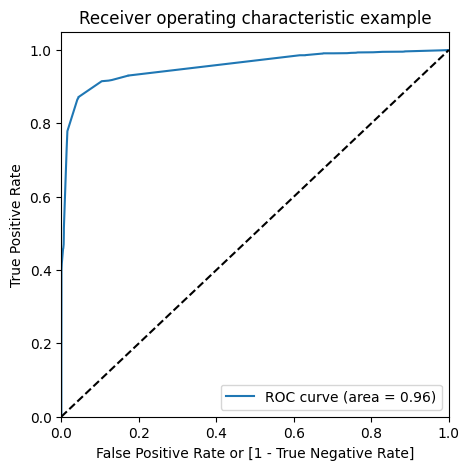

In [93]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

We are getting a good value of 0.96

Finding cut-off points

In [94]:
cut_off = [x/10 for x in range(10)]
for i in cut_off:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.999001,2982,1,1,1,1,1,1,1,1,1,1,1
1,0,0.088844,996,0,1,0,0,0,0,0,0,0,0,0
2,0,0.017533,9226,0,1,0,0,0,0,0,0,0,0,0
3,0,0.088844,4722,0,1,0,0,0,0,0,0,0,0,0
4,0,0.088844,7983,0,1,0,0,0,0,0,0,0,0,0


In [95]:
cutoff_data = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
for i in cut_off:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity= cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_data.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_data)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.389230     1.000000     0.000000
0.1   0.1  0.865690     0.930825     0.824181
0.2   0.2  0.903165     0.915049     0.895592
0.3   0.3  0.923004     0.870955     0.956174
0.4   0.4  0.922374     0.869337     0.956174
0.5   0.5  0.922374     0.866100     0.958237
0.6   0.6  0.922374     0.866100     0.958237
0.7   0.7  0.904267     0.778722     0.984274
0.8   0.8  0.904267     0.778722     0.984274
0.9   0.9  0.887419     0.732605     0.986079


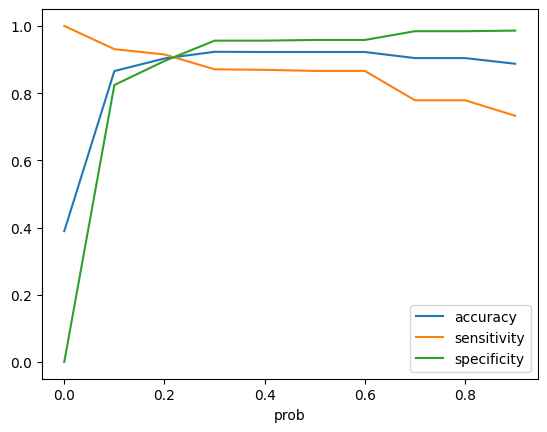

In [96]:
cutoff_data.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

from the curve 0.3 is the optimum point

In [97]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.999001,2982,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.088844,996,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.017533,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.088844,4722,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.088844,7983,0,1,0,0,0,0,0,0,0,0,0,0


In [98]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.999001,2982,1,100
1,0,0.088844,996,0,9
2,0,0.017533,9226,0,2
3,0,0.088844,4722,0,9
4,0,0.088844,7983,0,9


In [99]:
#accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.923004251299008

In [100]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3709,  170],
       [ 319, 2153]])

In [101]:
#sencityvity
TP / float(TP+FN)

0.8661003236245954

In [102]:
#specificity
TN / float(TN+FP)

0.9582366589327146

Obsevation

1. ROC curve value 0.96

2. Accuracy: 92.30%

3. Sencitivity: 86.61%

4.Specificity: 95.82%




Prediction on test set

In [103]:
numerical_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not mentioned,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_others,Tags_switched off
3241,-0.293528,0.305703,0.900245,-0.489895,1.508899,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1467,-0.293528,0.305703,0.754835,0.904404,-0.662735,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7932,-0.293528,-1.078218,-0.890690,-1.184433,-0.662735,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4187,-0.293528,0.305703,0.517393,0.904404,-0.662735,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3800,-0.293528,-0.040278,1.218674,0.382194,1.508899,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
X_test_sm = sm.add_constant(X_test)


In [108]:
X_test = X_test[col]

In [109]:
y_test_pred = res.predict(X_test_sm)

In [110]:
y_pred_1 = pd.DataFrame(y_test_pred) #converting to a dataframe


In [111]:
y_test_data = pd.DataFrame(y_test)

In [112]:
y_test_data['Prospect ID'] = y_test_data.index

In [113]:
#removing index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_data.reset_index(drop=True, inplace=True)

In [114]:
y_pred_final = pd.concat([y_test_data, y_pred_1],axis=1)

In [115]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,3241,0.996364
1,1,1467,0.996364
2,0,7932,0.065608
3,1,4187,0.996364
4,1,3800,0.088844


In [117]:
#renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [118]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [119]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3241,1,0.996364,100
1,1467,1,0.996364,100
2,7932,0,0.065608,7
3,4187,1,0.996364,100
4,3800,1,0.088844,9


In [121]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [122]:
# accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9269188395152406

In [123]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1637,   65],
       [ 134,  887]])

In [124]:
#sensitivity
TP / float(TP+FN)

0.8661003236245954

In [125]:
#specificity
TN / float(TN+FP)

0.9582366589327146

Ovservation

1 . Accuracy: 96.69%

2. Sencitivity: 86.61%

3. Specificity: 95.82%


Final data:

Train:

Accuracy: 92.30%

Sencitivity: 86.61%

Specificity: 95.82%


Test:

Accuracy: 96.69%

Sencitivity: 86.61%

Specificity: 95.82%